In [14]:
#import basic libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from datetime import datetime

# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

In [2]:
Weekly_df = pd.read_csv("Dataset\\Week_Death_Vac_2Y.csv")

In [19]:
CovidEstimator = pd.DataFrame(Weekly_df[['PercentOneDose','PercentCompleted','PercentFirstBooster','Administered','PeopleOneOrMore','PercentSeniorBooster']])
CovidWeeklyDeaths = pd.DataFrame(Weekly_df[['Weekly Deaths']])
CovidWeeklyCases = pd.DataFrame(Weekly_df[['Weekly Cases']])

In [22]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(CovidEstimator, CovidWeeklyDeaths, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (69, 1) (69, 6)
Test Set  : (24, 1) (24, 6)


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.057971014492753624

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.0



<AxesSubplot:>

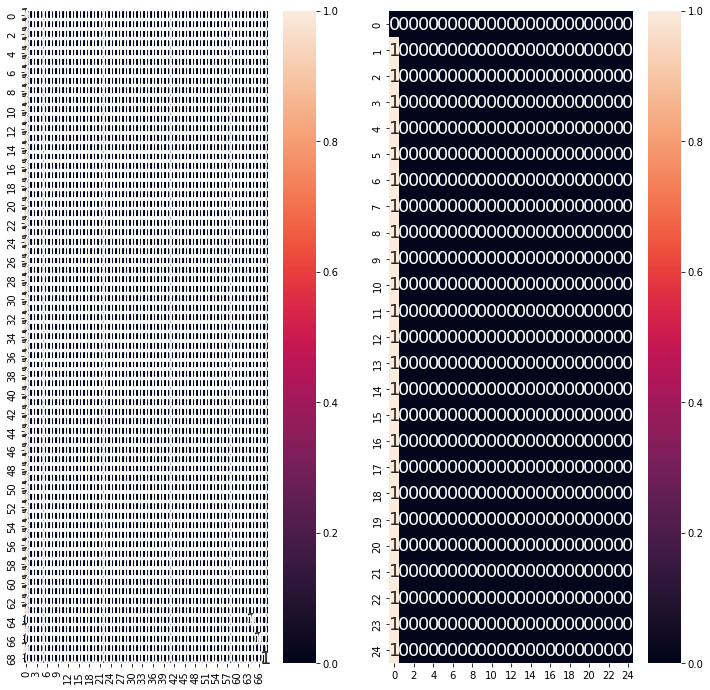

In [23]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 12))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

IndexError: list index out of range

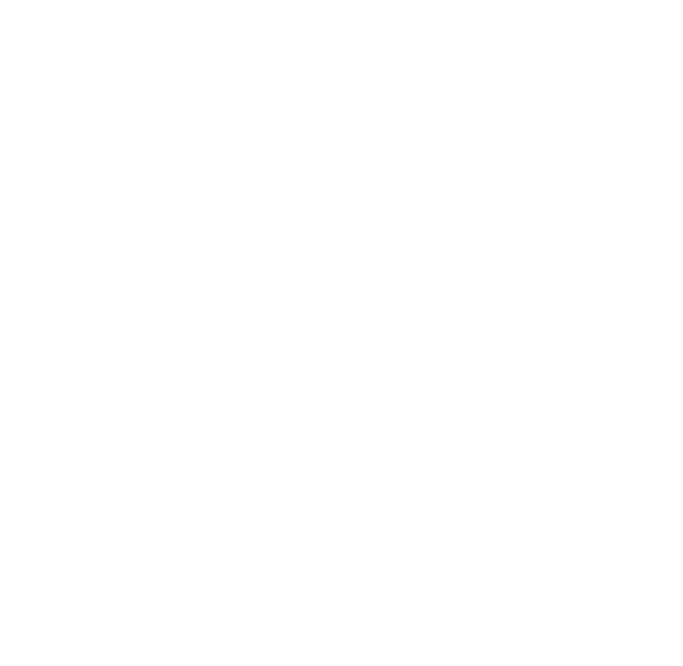

In [16]:

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=['CovidWeeklyCases'])